In [1]:
import pandas as pd

In [3]:
from numpy import mean

In [4]:
from numpy import std

In [5]:
from matplotlib import pyplot

In [6]:
from sklearn.model_selection import KFold

In [7]:
from keras.datasets import mnist

Using TensorFlow backend.


In [8]:
from keras.utils import to_categorical

In [9]:
from keras.models import Sequential

In [10]:
from keras.layers import Conv2D

In [11]:
from keras.layers import MaxPooling2D

In [12]:
from keras.layers import Dense

In [13]:
from keras.layers import Flatten

In [14]:
from keras.optimizers import SGD

In [15]:
def load_dataset():
	(trainX, trainY), (testX, testY) = mnist.load_data()
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [16]:
def prep_pixels(train, test):
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	return train_norm, test_norm

In [17]:
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [18]:
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	for train_ix, test_ix in kfold.split(dataX):
		model = define_model()
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		scores.append(acc)
		histories.append(history)
	return scores, histories

In [19]:
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		pyplot.subplot(2, 1, 1)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		pyplot.subplot(2, 1, 2)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	pyplot.show()

In [20]:
def summarize_performance(scores):
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	pyplot.boxplot(scores)
	pyplot.show()

In [21]:
def run_test_harness():
	trainX, trainY, testX, testY = load_dataset()
	trainX, testX = prep_pixels(trainX, testX)
	scores, histories = evaluate_model(trainX, trainY)
	summarize_diagnostics(histories)
	summarize_performance(scores)

> 98.817
> 98.958
> 98.575
> 99.108
> 98.967


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


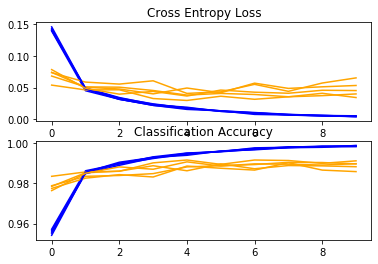

Accuracy: mean=98.885 std=0.180, n=5


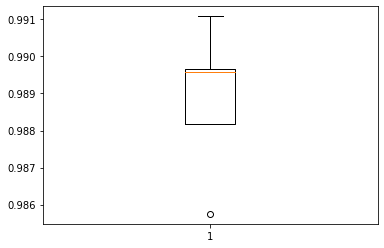

In [22]:
run_test_harness()